# Managing Workforce for ArcGIS projects

[Workforce for ArcGIS](http://doc.arcgis.com/en/workforce/) is a mobile solution that uses the power of location-based decision making for better field workforce coordination and teamwork. It is composed of a web app used by project administrators and dispatchers in the office, and a mobile app used by mobile workers on their devices. Organizations using Workforce for ArcGIS get these benefits:

- Everything you need on one device. Mobile workers can easily view and process work assignments, provide updates on work status, and inform others of their location, all from one device.

- Greater agility—Using real-time and location-based information, dispatchers can assign and prioritize fieldwork on the fly and ensure that work is assigned to the right people at the right time.

- Increased productivity—Replace time-consuming and error-prone manual workforce management processes, reduce downtime, and keep projects on schedule.

## Contents of a Workforce project

A workforce project is composed of four point feature layers:
 - **Workers** - contains a record for each mobile worker along with their contact number and job title.
 - **Assignments** - contains a record for each assignment. It stores information such as status, location, and description, among others.
 - **Dispatchers** - contains a record for each dispatcher within the project and includes information such as name and contact number.
 - **Location Tracking** - contains a record for each point location logged while location tracking is enabled.
 
and two web maps:
 - **Dispatcher web map** - for back-office dispatchers. It shows the assignments and worker locations
 - **Worker web map** - This map is what a field worker uses on their iOS or Android device.
 
and a **workforce** project item. This is an item on the portal that stores project meta data in json format. This item connects all the layers and maps described above.

The feature layers described above are named using a combination of a moniker, describing the purpose of the feature layer, appended with the GUID of the Workforce project item. For example, the Workers layer associated with a project with GUID `5dd018fcd88c4d33814cf3da9c44061e` would be named `workers_5dd018fcd88c4d33814cf3da9c44061e`. This guarantees uniqueness of each feature layer. The four feature layers are connected to one-another using primary key-foreign key relationships to track the workforce. To know more about those details, refer [here](https://doc.arcgis.com/en/workforce/android-phone/help/workforce-schema.htm).

## What can you do with this module?
Using the `workforce` module under the `arcgis.apps` module, you can automate the following tasks:

### Workers and Dispatchers
- Adding Dispatchers and Workers to a Project
- Deleting Dispatchers and Workers from a Project
- Updating Workers and Dispatchers in a Project
- Searching Workers and Dispatchers in a Project

### Assignments
- Adding Assignments to a Project
- Deleting Assignments from a Project
- Updating Assignments in a Project
- Assigning Assignments in a Project
- Searching Assignments in a Project
- Adding/Removing/Downloading Attachments

### Tracks
- Searching Tracks (for analysis)

## Get Started

A user must be authenticated with a GIS in order to fetch a Project. The workforce functionality is available in `arcgis.apps.workforce` module.

In [1]:
from arcgis.gis import GIS
from arcgis.apps import workforce

gis = GIS('https://arcgis.com', 'arcgis_python')

Enter password: ········


### Workforce Project
A project is created using its corresponding item.

<Item title:"demo-workforce-project" type:Workforce Project owner:arcgis_python>
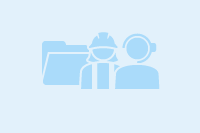

In [6]:
workforce_project_item = gis.content.get("c63e3d46af7d4204b66b18d43a188c2e")
workforce_project_item

In [23]:
project = workforce.Project(item=workforce_project_item)
project

<Project c63e3d46af7d4204b66b18d43a188c2e>

### Assignments
`Assignment` objects are accessed by using the `assignments` property off the `Project` object. Assignments can be added, updated, or deleted. Additionally, attachments can be added, deleted, or downloaded by using the `attachments` property off the `Assignment` object.

In [11]:
# Search all assignments
assignments = project.assignments.search()
assignments

[<Assignment 1>, <Assignment 2>]

In [3]:
# View first assignment
assignment = assignments[0]
print(f"Status: {assignment.status}")
print(f"Description: {assignment.description}")
print(f"Priority: {assignment.priority}")
print(f"Assigned To: {assignment.worker.name}")
print(f"Type: {assignment.assignment_type}")

# Update the description of the assignment
assignment.update(description="You need to do an inspection here")
print("--------------------")
print(f"Updated Description: {project.assignments.search()[0].description}")

# Download the assignment using the AssignmentAttachmentManager
assignment.attachments.download()

Status: assigned
Description: Do some work at the ESRI R&D Center
Priority: medium
Assigned To: Aaron Pulver
Type: Inspection
--------------------
Updated Description: You need to do an inspection here


['/Users/aaro8157/PycharmProjects/arcgis-python-api/samples/02_power_users_developers/esri_logo1.png']

#### Assignment Types
Assignment types are created when the workforce project is originally created. All assignments fall under one or the other assignment types. You can access these types by calling the `assignment_types` property off the `Project` item. Assignment types can be added, updated, or deleted.

In [4]:
# List all assignment types
assignment_types = project.assignment_types.search()
for at in assignment_types:
    print(f"Type: {at.name}")
    
# Add a new assignment type
project.assignment_types.add(name="Repair")

# Confirm that it was added
print("--------------------")
assignment_types = project.assignment_types.search()
for at in assignment_types:
    print(f"Type: {at.name}")

Type: Inspection
Type: Removal
--------------------
Type: Inspection
Type: Removal
Type: Repair


### Workers
`Worker` objects are accessed by using `workers` property off the `Project` object. Workers can be added, updated, or deleted.

In [5]:
# Search all workers and print details about first worker 
workers = project.workers.search()
worker = workers[0]
print(f"Name: {worker.name}")
print(f"Number: {worker.contact_number}")
    
# Update the workers contact number
worker.update(contact_number="123-456-7890")
print("--------------------")
print(f"Number: {project.workers.search()[0].contact_number}")

Name: Aaron Pulver
Number: None
--------------------
Number: 123-456-7890


**Note**: Workers and Dispatchers should be named users in your GIS.

In [6]:
# Add a new worker
project.workers.add(name="Demo User", 
                    user_id="demouser_nitro", 
                    contact_number="123-987-4560")

<Worker 34>

### Dispatchers
`Dispatcher` objects are accessed by using `dispatchers` property off the `Project` object. Dispatchers can be added, updated, or deleted.

In [7]:
# Search for all dispatchers and print details about first dispatcher
dispatchers = project.dispatchers.search()
dispatcher = dispatchers[0]
print(f"Name: {dispatcher.name}")
print(f"Number: {dispatcher.contact_number}")
    
# Update the dispatchers contact number
dispatcher.update(contact_number="123-456-7890")
print("--------------------")
print(f"Number: {project.dispatchers.search()[0].contact_number}")

Name: workforce scripts
Number: 987-654-3210
--------------------
Number: 123-456-7890


### Web maps
The dispatcher and worker `WebMap` objects can be accessed using the corresponding properties as shown in the following code snippet. Using the `WebMap` object, additional layers could be added or removed from either maps.

In [15]:
# Worker webmap
worker_webmap = project.worker_webmap
type(worker_webmap)

arcgis.mapping._types.WebMap

In [17]:
worker_webmap

![](../../static/img/guide_workforce_worker_map.png)

In [25]:
# Dispatcher webmap
dispatcher_webmap = project.dispatcher_webmap
dispatcher_webmap

![](../../static/img/guide_workforce_dispatcher_map.png)

## Putting it all together
In the following snippet, a new assignment will be created at the ESRI campus. Assignments (as well as workers, assignment types, dispatchers, and tracks) are all validated prior to upload. The ensures the integrity of the workforce project.

In [10]:
# Add a new assignment and assign it to demouser
from datetime import datetime
demouser = project.workers.get(user_id='demouser_nitro')
dispatcher = project.dispatchers.get(user_id='workforce_scripts')
repair = project.assignment_types.get(name="Repair")

# Use the geocoder to find the location of ESRI
from arcgis.geocoding import geocode
geometry = geocode("ESRI, Redlands, CA", out_sr=102100)[0]['location']

# Add a new assignment
project.assignments.add(assignment_type=repair,
                       status="assigned",
                       assigned_date=datetime.now(),
                       worker=demouser,
                       dispatcher=dispatcher,
                       location="ESRI, Redlands, CA",
                       geometry=geometry)

<Assignment 66>

### Reset the Demo Project
The following code resets the project to the intial state for this demo. It also highlights how batch methods can be used to add/update/delete many workforce items at once. This is useful when processing large amounts of assignments, workers, or dispatchers. In general, batch methods make fewer calls to the backend server thus reducing the overall time of the script.

In [11]:
# Use batch functions to process multiple items at a time
project.assignments.batch_delete(project.assignments.search(where='assignmentType=3'))
project.assignment_types.batch_delete([project.assignment_types.get(name="Repair")])
project.workers.batch_delete([project.workers.get(user_id="demouser_nitro")])

# Reset the assignment description
a = project.assignments.get(object_id=1)
a.update(description="Do some work at the ESRI R&D Center")

# Reset the worker using batch update
w1 = project.workers.get(object_id=1)
w1.contact_number = None
project.workers.batch_update([w1])

# Reset the dispatcher using batch update
d1 = project.dispatchers.get(object_id=1)
d1.contact_number = "987-654-3210"
project.dispatchers.batch_update([d1])

[<Dispatcher 1>]